In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import random

In [17]:
train_filepath = 'data/train.csv'
traindata = pd.read_table(train_filepath)
test_filepath =  'data/test.csv'
testdata = pd.read_table(test_filepath)

print(traindata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232744 entries, 0 to 232743
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Row                          232744 non-null  int64  
 1   Anon Student Id              232744 non-null  object 
 2   Problem Hierarchy            232744 non-null  object 
 3   Problem Name                 232744 non-null  object 
 4   Problem View                 232744 non-null  int64  
 5   Step Name                    232744 non-null  object 
 6   Step Start Time              232452 non-null  object 
 7   First Transaction Time       232744 non-null  object 
 8   Correct Transaction Time     225710 non-null  object 
 9   Step End Time                232744 non-null  object 
 10  Step Duration (sec)          232452 non-null  float64
 11  Correct Step Duration (sec)  181599 non-null  float64
 12  Error Step Duration (sec)    50853 non-null   float64
 13 

In [18]:
print(traindata.describe())

                Row   Problem View  Step Duration (sec)  \
count  2.327440e+05  232744.000000        232452.000000   
mean   5.567699e+05       1.602838            27.248601   
std    3.127712e+05       1.515546            54.967375   
min    9.938000e+03       1.000000             0.000000   
25%    3.124558e+05       1.000000             5.000000   
50%    5.467775e+05       1.000000            11.000000   
75%    8.466502e+05       2.000000            26.000000   
max    1.078860e+06      21.000000          1888.000000   

       Correct Step Duration (sec)  Error Step Duration (sec)  \
count                181599.000000               50853.000000   
mean                     17.924024                  60.547204   
std                      35.179534                  89.287960   
min                       0.000000                   0.000000   
25%                       5.000000                  16.000000   
50%                       8.000000                  32.000000   
75%          

In [59]:
#Head examples of train data
traindata.head(10)

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,9938,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R1C1,2005-09-09 12:23:34.0,2005-09-09 12:24:07.0,2005-09-09 12:24:07.0,2005-09-09 12:24:07.0,33.0,33.0,NaN,1,0,0,1,NaN,NaN
1,9939,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R1C2,2005-09-09 12:24:07.0,2005-09-09 12:24:22.0,2005-09-09 12:24:22.0,2005-09-09 12:24:22.0,15.0,15.0,NaN,1,0,0,1,NaN,NaN
2,9940,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R3C1,2005-09-09 12:24:22.0,2005-09-09 12:25:16.0,2005-09-09 12:25:40.0,2005-09-09 12:25:40.0,78.0,NaN,78.0,0,2,0,1,Define Variable,1
3,9941,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R3C2,2005-09-09 12:25:40.0,2005-09-09 12:25:51.0,2005-09-09 12:27:24.0,2005-09-09 12:27:24.0,104.0,NaN,104.0,0,4,9,1,"Using small numbers~~Write expression, positiv...",1~~1~~1
4,9942,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R4C1,2005-09-09 12:27:24.0,2005-09-09 12:27:30.0,2005-09-09 12:27:30.0,2005-09-09 12:27:30.0,6.0,6.0,NaN,1,0,0,1,Entering a given,1
5,9943,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R5C1,2005-09-09 12:27:30.0,2005-09-09 12:27:41.0,2005-09-09 12:27:41.0,2005-09-09 12:27:41.0,11.0,11.0,NaN,1,0,0,1,Entering a given,2
6,9944,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R6C1,2005-09-09 12:27:41.0,2005-09-09 12:28:41.0,2005-09-09 12:28:41.0,2005-09-09 12:28:41.0,60.0,60.0,NaN,1,0,0,1,Entering a given,3
7,9945,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R7C2,2005-09-09 12:28:50.0,2005-09-09 12:28:58.0,2005-09-09 12:28:58.0,2005-09-09 12:28:58.0,8.0,8.0,NaN,1,0,0,1,Entering a given,4
8,9946,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,ValidEquations,2005-09-09 12:31:39.0,2005-09-09 12:31:52.0,2005-09-09 12:31:52.0,2005-09-09 12:31:52.0,13.0,13.0,NaN,1,0,0,2,NaN,NaN
9,9947,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,7/10*X = 1400,2005-09-09 12:31:52.0,2005-09-09 12:32:28.0,2005-09-09 12:32:35.0,2005-09-09 12:32:35.0,43.0,NaN,43.0,0,1,0,1,NaN,NaN


In [58]:
#tail examples of train data
traindata.tail()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
232739,1078856,JP20cryBg8,"Unit CTA1_24, Section CTA1_24-1",NOV05,1,R5C1,2006-04-12 10:17:08.0,2006-04-12 10:17:17.0,2006-04-12 10:18:19.0,2006-04-12 10:18:19.0,71.0,NaN,71.0,0,2,5,1,"Entering a given~~Convert unit, mixed",21~~1
232740,1078857,JP20cryBg8,"Unit CTA1_24, Section CTA1_24-1",NOV05,1,R1C2,2006-04-12 10:18:19.0,2006-04-12 10:18:40.0,2006-04-12 10:18:40.0,2006-04-12 10:18:40.0,21.0,21.0,NaN,1,0,0,1,NaN,NaN
232741,1078858,JP20cryBg8,"Unit CTA1_24, Section CTA1_24-1",NOV05,1,R2C2,2006-04-12 10:18:40.0,2006-04-12 10:18:44.0,2006-04-12 10:18:44.0,2006-04-12 10:18:44.0,4.0,4.0,NaN,1,0,0,1,Identifying units,7
232742,1078859,JP20cryBg8,"Unit CTA1_24, Section CTA1_24-1",NOV05,1,R3C2,2006-04-12 10:18:44.0,2006-04-12 10:18:58.0,2006-04-12 10:20:55.0,2006-04-12 10:20:55.0,131.0,NaN,131.0,0,1,0,1,"Using small numbers~~Write expression, positiv...",8~~5~~11
232743,1078860,JP20cryBg8,"Unit CTA1_24, Section CTA1_24-1",NOV05,1,R6C2,2006-04-12 10:20:55.0,2006-04-12 10:21:07.0,2006-04-12 10:21:07.0,2006-04-12 10:21:07.0,12.0,12.0,NaN,1,0,0,1,Entering a given,22


In [12]:
#Head examples of test data
testdata.head(10)

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,10039,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP01,1,2/300*X = 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10482,52vEY7f17k,"Unit CTA1_06, Section CTA1_06-3",FOR05,1,xScale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Changing axis intervals,28
2,11024,52vEY7f17k,"Unit ES_03, Section ES_03-6",EG52,1,2.9 = -2x+3.7+x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[SkillRule: Consolidate vars, no coeff; CLT]",27
3,11476,52vEY7f17k,"Unit CTA1_08, Section CTA1_08-3",REAL10,1,yScale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Changing axis intervals,65
4,11948,52vEY7f17k,"Unit ES_04, Section ES_04-12",EG58,7,xR2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,12532,52vEY7f17k,"Unit CTA1_10, Section CTA1_10-5",DIST05_SP,1,R1C2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12955,52vEY7f17k,"Unit ES_07, Section ES_07-4",LIT69A,4,z*u-n*j+z*g = 16n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[SkillRule: Consolidate vars, any; {Combine va...",42
7,19200,6W08a98ZQV,"Unit ES_02, Section ES_02-8",EG41,2,FinalAnswer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,perform-mult-sp,9
8,19384,6W08a98ZQV,"Unit CTA1_13, Section CTA1_13-1",PROP10,1,R1C2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,19835,6W08a98ZQV,"Unit CTA1_06, Section CTA1_06-3",FOR05,2,XLabel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Labelling the axes,33


In [4]:
traindata.columns

Index(['Row', 'Anon Student Id', 'Problem Hierarchy', 'Problem Name',
       'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')

In [5]:
def get_unique_number(name):
    num = len(np.unique(traindata[name]))
    print('Number of unique', name ,': ', num)
    return num

uniques = dict()
uniques["Anon Student Id"] = get_unique_number("Anon Student Id")
uniques["Problem Name"] = get_unique_number("Problem Name")
uniques["Problem Hierarchy"] = get_unique_number("Problem Hierarchy")
uniques["Problem View"] = get_unique_number("Problem View")
uniques["Step Name"] = get_unique_number("Step Name")

Number of unique Anon Student Id :  174
Number of unique Problem Name :  1021
Number of unique Problem Hierarchy :  138
Number of unique Problem View :  21
Number of unique Step Name :  60709


In [34]:
#Find the number of NaN in one line.
traindata.isnull().sum()

Row                                 0
Anon Student Id                     0
Problem Hierarchy                   0
Problem Name                        0
Problem View                        0
Step Name                           0
Step Start Time                   292
First Transaction Time              0
Correct Transaction Time         7034
Step End Time                       0
Step Duration (sec)               292
Correct Step Duration (sec)     51145
Error Step Duration (sec)      181891
Correct First Attempt               0
Incorrects                          0
Hints                               0
Corrects                            0
KC(Default)                     59255
Opportunity(Default)            59255
dtype: int64

In [6]:
csd = traindata['Correct Step Duration (sec)']
csd.describe()

count    181599.000000
mean         17.924024
std          35.179534
min           0.000000
25%           5.000000
50%           8.000000
75%          17.000000
max        1067.000000
Name: Correct Step Duration (sec), dtype: float64

In [9]:
csd = traindata['Step Duration (sec)']
csd.describe()

count    232452.000000
mean         27.248601
std          54.967375
min           0.000000
25%           5.000000
50%          11.000000
75%          26.000000
max        1888.000000
Name: Step Duration (sec), dtype: float64

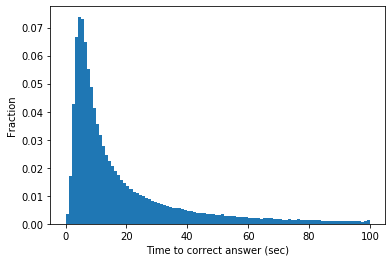

In [14]:
hist = plt.hist(np.array(csd.dropna()),bins=100,density=True,log=False,range=(0,100))
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Fraction')
plt.show()

Text(0, 0.5, 'number')

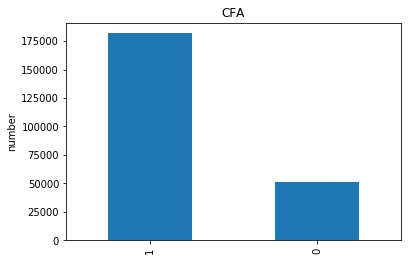

In [21]:
plt.subplot2grid((1, 1),(0,0))

traindata["Correct First Attempt"].value_counts().plot(kind = 'bar')
plt.title("CFA")
plt.ylabel("number")

In [30]:
pa = '''plt.subplot2grid((2,3),(1,2))
traindata["Correct First Attempt"].value_counts().plot(kind = 'bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")
Survived_0 = tradindata["Anon Student Id"][traindata["Correct First Attempt"] == 0].value_counts()
Survived_1 = tradindata["Anon Student Id"][traindata["Correct First Attempt"] == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级")
plt.ylabel(u"人数")'''

Text(0, 0.5, 'number')

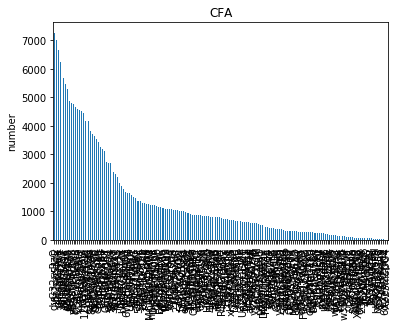

In [23]:
plt.subplot2grid((1, 1),(0,0))

traindata["Anon Student Id"].value_counts().plot(kind = 'bar')
plt.title("CFA")
plt.ylabel("number")

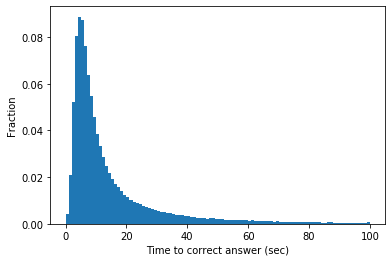

In [93]:
csd = traindata['Correct Step Duration (sec)']
hist = plt.hist(np.array(csd.dropna()),bins=100,density=True,log=False,range=(0,100))
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Fraction')
plt.show()

In [26]:
#the CFA average describe by the Problem Name
PNaverage = pd.pivot_table(traindata, index = ["Problem Name"])
PNaverage["Correct First Attempt"].describe()

count    1021.000000
mean        0.760887
std         0.125742
min         0.000000
25%         0.700000
50%         0.777778
75%         0.839286
max         1.000000
Name: Correct First Attempt, dtype: float64

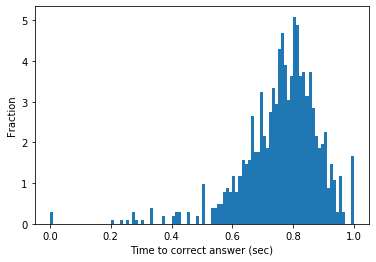

In [100]:
PNtotal = PNaverage["Correct First Attempt"]
hist = plt.hist(np.array(PNtotal.dropna()),bins=100,density=True,log=False,range=(0,1))
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Fraction')
plt.show()

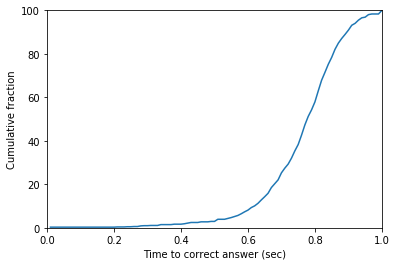

In [102]:
counts, bins = hist[0], hist[1]
cdf = np.cumsum(counts)
plt.plot(bins[1::], cdf)
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Cumulative fraction')
plt.axis((0,1,0,100))
plt.show()

In [27]:
#the CFA average describe by the Anon Student Id
ASIaverage = pd.pivot_table(traindata, index = ["Anon Student Id"])
ASIaverage["Correct First Attempt"].describe()

count    174.000000
mean       0.777757
std        0.080196
min        0.425926
25%        0.738195
50%        0.789404
75%        0.831422
max        1.000000
Name: Correct First Attempt, dtype: float64

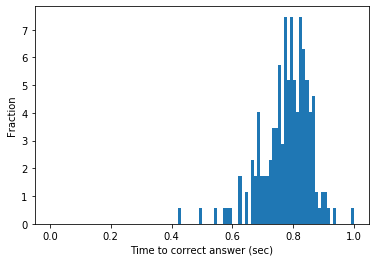

In [103]:
ASItotal = ASIaverage["Correct First Attempt"]
hist = plt.hist(np.array(ASItotal.dropna()),bins=100,density=True,log=False,range=(0,1))
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Fraction')
plt.show()

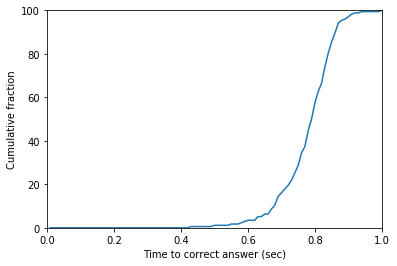

In [104]:
counts, bins = hist[0], hist[1]
cdf = np.cumsum(counts)
plt.plot(bins[1::], cdf)
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Cumulative fraction')
plt.axis((0,1,0,100))
plt.show()

In [28]:
ASIPNaverage = pd.pivot_table(traindata, index = ["Anon Student Id", "Problem Name"])
ASIPNaverage["Correct First Attempt"].describe()

count    16147.000000
mean         0.791056
std          0.188299
min          0.000000
25%          0.690066
50%          0.818182
75%          0.937500
max          1.000000
Name: Correct First Attempt, dtype: float64

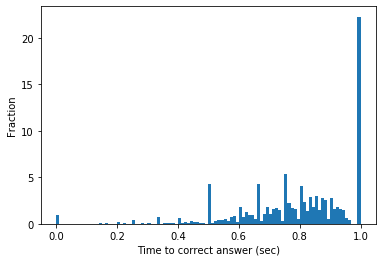

In [107]:
ASIPNtotal = ASIPNaverage["Correct First Attempt"]
hist = plt.hist(np.array(ASIPNtotal.dropna()),bins=100,density=True,log=False,range=(0,1))
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Fraction')
plt.show()

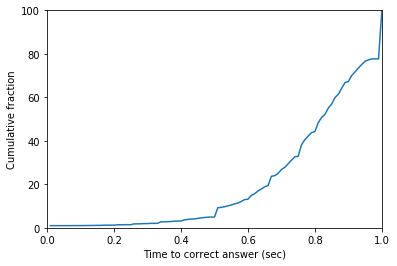

In [108]:
counts, bins = hist[0], hist[1]
cdf = np.cumsum(counts)
plt.plot(bins[1::], cdf)
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Cumulative fraction')
plt.axis((0,1,0,100))
plt.show()

In [32]:
#the CFA average describe by the Hints
Haverage = pd.pivot_table(traindata, index = ["Hints"])
Haverage["Correct First Attempt"].describe()

count    41.000000
mean      0.034288
std       0.135059
min       0.000000
25%       0.000000
50%       0.000000
75%       0.016393
max       0.848872
Name: Correct First Attempt, dtype: float64

In [38]:
#the CFA average describe by the Problem View
PVaverage = pd.pivot_table(traindata, index = ["Problem View"])
PVaverage["Correct First Attempt"].describe()

count    21.000000
mean      0.812672
std       0.045286
min       0.752066
25%       0.784758
50%       0.807864
75%       0.821429
max       0.916667
Name: Correct First Attempt, dtype: float64

Text(0, 0.5, '人数')

C:\Users\Lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25353 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30475 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33719 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25937 missing 

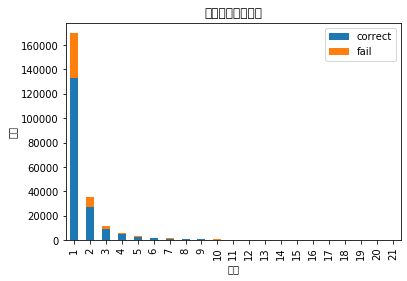

In [109]:
correct = traindata["Problem View"][traindata["Correct First Attempt"] == 1].value_counts()
fail = traindata["Problem View"][traindata["Correct First Attempt"] == 0].value_counts()

df = pd.DataFrame({'correct':correct,'fail':fail})
df.plot(kind='bar',stacked =True)
plt.title(u'按性别看获救情况')
plt.xlabel(u'性别')
plt.ylabel(u'人数')

In [45]:
#the CFA average describe by the KC
KCaverage = pd.pivot_table(traindata, index = ["KC(Default)"])
KCaverage["Correct First Attempt"].describe()

count    348.000000
mean       0.559564
std        0.330352
min        0.000000
25%        0.333333
50%        0.608800
75%        0.821717
max        1.000000
Name: Correct First Attempt, dtype: float64

In [46]:
#the CFA average describe by the KC and Opportunity
KCaverage = pd.pivot_table(traindata, index = ["KC(Default)", "Opportunity(Default)"])
KCaverage["Correct First Attempt"].describe()

count    49131.000000
mean         0.687543
std          0.436947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Correct First Attempt, dtype: float64

Text(0, 0.5, 'number')

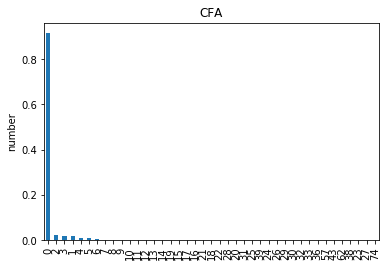

In [37]:
plt.subplot2grid((1, 1),(0,0))

(traindata["Hints"].value_counts()).plot(kind = "bar", stacked = True)
plt.title("CFA")
plt.ylabel("number")

Text(0, 0.5, 'number')

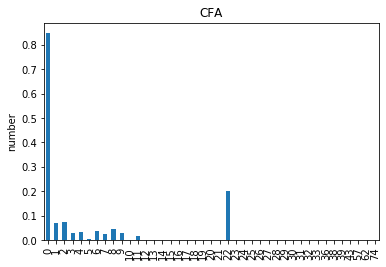

In [42]:
plt.subplot2grid((1, 1),(0,0))

(traindata["Hints"][traindata["Correct First Attempt"] == 1].value_counts()/traindata["Hints"].value_counts()).plot(kind = "bar", stacked = True)
plt.title("CFA")
plt.ylabel("probability")

Text(0, 0.5, 'probability')

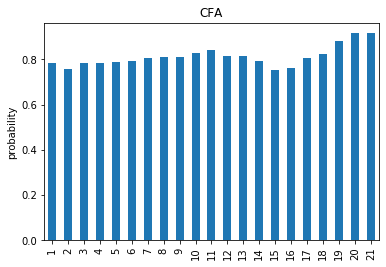

In [43]:
plt.subplot2grid((1, 1),(0,0))

(traindata["Problem View"][traindata["Correct First Attempt"] == 1].value_counts()/traindata["Problem View"].value_counts()).plot(kind = "bar", stacked = True)
plt.title("CFA")
plt.ylabel("probability")

Text(0, 0.5, 'probability')

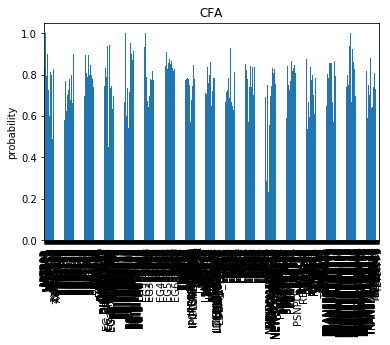

In [47]:
plt.subplot2grid((1, 1),(0,0))

(traindata["Problem Name"][traindata["Correct First Attempt"] == 1].value_counts()/traindata["Problem Name"].value_counts()).plot(kind = "bar", stacked = True)
plt.title("CFA")
plt.ylabel("probability")

Text(0, 0.5, 'probability')

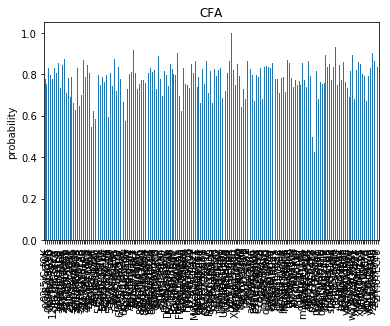

In [50]:
plt.subplot2grid((1, 1),(0,0))

(traindata["Anon Student Id"][traindata["Correct First Attempt"] == 1].value_counts()/traindata["Anon Student Id"].value_counts()).plot(kind = "bar", stacked = True)
plt.title("CFA")
plt.ylabel("probability")

In [111]:
ku = pd.pivot_table(traindata, index = ["Problem Name", "Step Name"])

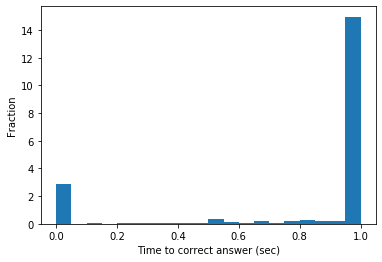

In [114]:
ASIPNdtotal = ku["Correct First Attempt"]
hist = plt.hist(np.array(ASIPNdtotal.dropna()),bins=20,density=True,log=False,range=(0,1))
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Fraction')
plt.show()

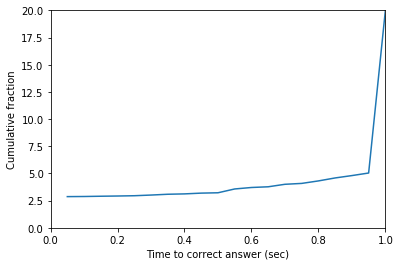

In [115]:
counts, bins = hist[0], hist[1]
cdf = np.cumsum(counts)
plt.plot(bins[1::], cdf)
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Cumulative fraction')
plt.axis((0,1,0,20))
plt.show()